In [8]:
import tensorflow as tf
import numpy as np
from grad_cam import get_gradcam_heatmap, combine_image_and_heatmap

import matplotlib.pyplot as plt

In [9]:
# Load model
model = tf.keras.models.load_model("../training/results/trained_model.h5")
#model.summary()

In [10]:
# Read in data
ds_test = tf.data.experimental.load('../cache/ds_test.tf')

In [11]:
# Evaluate model
model.compile(loss='categorical_crossentropy', metrics='accuracy')
results = model.evaluate(ds_test.batch(32), verbose=False)
print(f"Test loss {results[0]}, Test acc {results[1]}")

ValueError: in user code:

    File "/mnt/0A60B2CB60B2BD2F/interpreters/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "/mnt/0A60B2CB60B2BD2F/interpreters/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/mnt/0A60B2CB60B2BD2F/interpreters/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "/mnt/0A60B2CB60B2BD2F/interpreters/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1471, in test_step
        y_pred = self(x, training=False)
    File "/mnt/0A60B2CB60B2BD2F/interpreters/Python-3.9/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/mnt/0A60B2CB60B2BD2F/interpreters/Python-3.9/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 64, 64, 1), found shape=(None, 384, 216, 1)


In [5]:
# Model predict
y_test = [label for image,label in list(ds_test.as_numpy_iterator())]
y_test_idx = tf.argmax(y_test, axis=1)
predictions = model.predict(ds_test.batch(32))
predictions_idx = tf.argmax(predictions, axis=1)

In [6]:
# Confusion matrix
conf_mat = tf.math.confusion_matrix(y_test_idx, predictions_idx)
print(conf_mat)

tf.Tensor(
[[ 0  0 31]
 [ 0  0 34]
 [ 0  0 35]], shape=(3, 3), dtype=int32)


Predicted: [0.32570592 0.2834226  0.39087152]
(192, 108)
(384, 216, 1)


IndexError: arrays used as indices must be of integer (or boolean) type

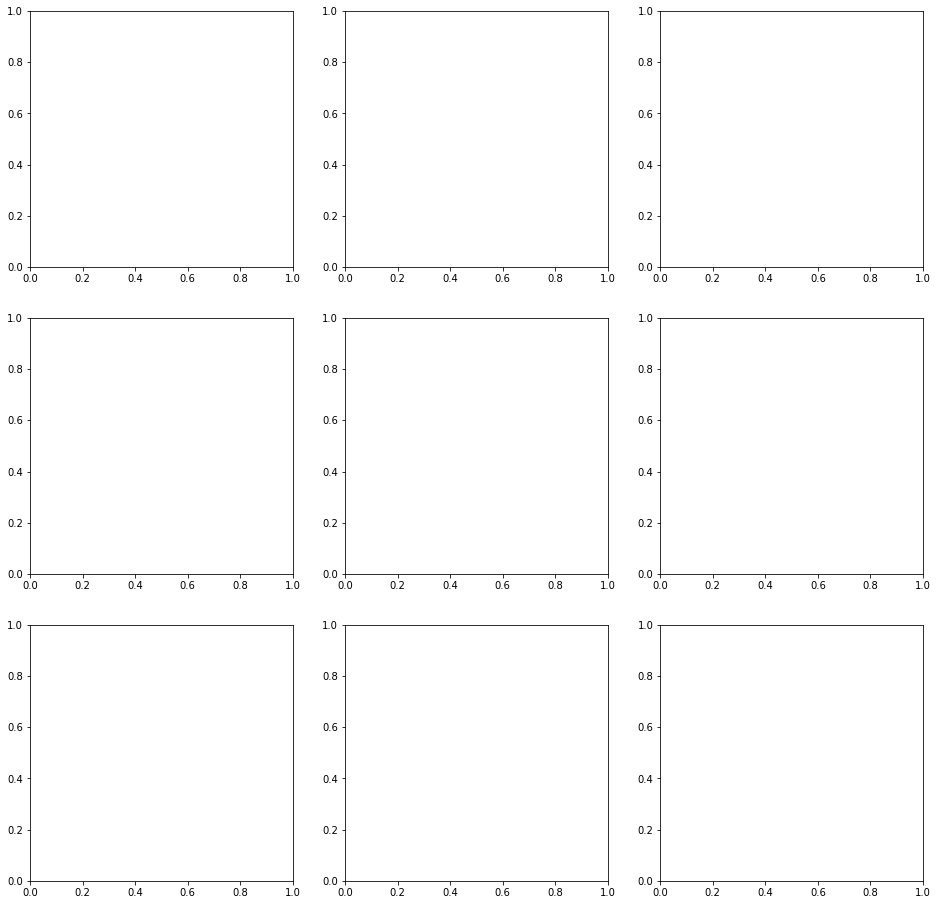

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
axs = axs.flatten()

for data_point, ax in zip(ds_test.take(9), axs):
    image, label = data_point
    img_array = np.expand_dims(image, axis=0)

    # Print what the top predicted class is
    preds = model.predict(img_array)
    print("Predicted:", preds[0])

    # Generate class activation heatmap
    heatmap = get_gradcam_heatmap(image, model, 'conv2d_1')
    print(heatmap.shape)

    print(image.shape)

    superimposed_image = combine_image_and_heatmap(image, heatmap, alpha=0.4)

    # Display heatmap
    ax.imshow(superimposed_image)
    font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 12,
    }
    ax.axis('off')
    ax.set_title(label.numpy().tolist(), fontdict=font_axis_publish)
    #plt.show()